In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
%matplotlib inline

In [2]:
gdp_df = pd.read_csv('../data/gdp_per_capita.csv', skipfooter=2, engine='python')

In [3]:
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,NaN
5,Afghanistan,2013,1807.762344,NaN
6,Afghanistan,2012,1772.764974,NaN
7,Afghanistan,2011,1626.764793,NaN
8,Afghanistan,2010,1671.581238,NaN
9,Afghanistan,2009,1502.354073,NaN


In [4]:
gdp_df.tail(5)

,Country or Area,Year,Value,Value Footnotes
6724,Zimbabwe,1994,2768.309953,NaN
6725,Zimbabwe,1993,2572.870395,NaN
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN
6728,Zimbabwe,1990,2819.549467,NaN


In [5]:
gdp_df.tail(5)

,Country or Area,Year,Value,Value Footnotes
6724,Zimbabwe,1994,2768.309953,NaN
6725,Zimbabwe,1993,2572.870395,NaN
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN
6728,Zimbabwe,1990,2819.549467,NaN


In [6]:
gdp_df = gdp_df.drop('Value Footnotes', axis = 1)

In [7]:
gdp_df = gdp_df.rename(columns = {'Country or Area' : 'Country','Value':'GDP_Per_Capita' })

In [8]:
print(gdp_df.shape)

(6729, 3)


In [9]:
print(gdp_df.dtypes)

Country            object
Year                int64
GDP_Per_Capita    float64
dtype: object


In [10]:
gdp_df.info

<bound method DataFrame.info of           Country  Year  GDP_Per_Capita
0     Afghanistan  2018     1734.723214
1     Afghanistan  2017     1758.465636
2     Afghanistan  2016     1757.023490
3     Afghanistan  2015     1766.593077
4     Afghanistan  2014     1795.735834
...           ...   ...             ...
6724     Zimbabwe  1994     2768.309953
6725     Zimbabwe  1993     2572.870395
6726     Zimbabwe  1992     2591.007534
6727     Zimbabwe  1991     2906.272849
6728     Zimbabwe  1990     2819.549467

[6729 rows x 3 columns]>

In [11]:
gdp_df.Year.value_counts().sort_index()

1990    210
1991    211
1992    213
1993    215
1994    218
1995    224
1996    224
1997    226
1998    227
1999    228
2000    236
2001    237
2002    238
2003    238
2004    238
2005    238
2006    238
2007    239
2008    240
2009    241
2010    241
2011    243
2012    241
2013    241
2014    240
2015    240
2016    239
2017    239
2018    226
Name: Year, dtype: int64

Steady rise until peak at 2011. Then remains steady with a sharp drop from 2017-2018

In [12]:
gdp_df.Country.describe()

count           6729
unique           243
top       Uzbekistan
freq              29
Name: Country, dtype: object

In [13]:
gdp_df.Country.value_counts()

Uzbekistan                   29
Indonesia                    29
India                        29
Denmark                      29
Lower middle income          29
                             ..
Nauru                        12
Sint Maarten (Dutch part)     9
South Sudan                   8
Turks and Caicos Islands      8
Djibouti                      1
Name: Country, Length: 243, dtype: int64

In [14]:
gdp_2014 = gdp_df[gdp_df['Year']==2014] 
print(gdp_2014.describe())

         Year  GDP_Per_Capita
count   240.0      240.000000
mean   2014.0    18034.303556
std       0.0    19320.930599
min    2014.0      672.681648
25%    2014.0     4301.187365
50%    2014.0    11868.067810
75%    2014.0    24388.408410
max    2014.0   130439.106674


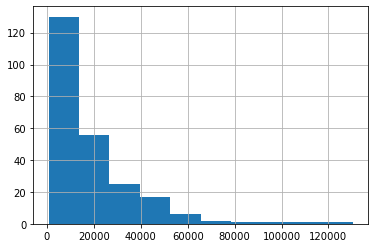

In [15]:
gdp_2014.GDP_Per_Capita.hist(bins=10)

In [16]:
gdp_2014.sort_values(by=['GDP_Per_Capita'])

,Country,Year,GDP_Per_Capita
1014,Central African Republic,2014,672.681648
794,Burundi,2014,768.469837
1375,Dem. Rep. Congo,2014,784.872656
4414,Niger,2014,900.136918
3697,Malawi,2014,1142.530804
...,...,...,...
707,Brunei,2014,76448.593329
5316,Singapore,2014,81965.361071
3610,Luxembourg,2014,92349.186429
5003,Qatar,2014,116693.507701


In [17]:
gdp_1990_2017 =gdp_df[gdp_df['Year'].isin([1990,2017])]
print(gdp_1990_2017.head())

        Country  Year  GDP_Per_Capita
1   Afghanistan  2017     1758.465636
18      Albania  2017    11796.719185
45      Albania  1990     4458.247115
47      Algeria  2017    13822.389087
74      Algeria  1990    10300.015042


In [18]:
gdp_pivoted = gdp_1990_2017.pivot_table(values = 'GDP_Per_Capita', index = 'Country', columns = 'Year')
gdp_pivoted

Year,1990,2017
Country,,
Afghanistan,NaN,1758.465636
Albania,4458.247115,11796.719185
Algeria,10300.015042,13822.389087
Angola,4761.229638,6044.972035
Antigua and Barbuda,17454.549799,22400.379562
...,...,...
West Bank and Gaza,NaN,4651.723645
World,8966.014072,15527.280228
Yemen,3425.707169,2404.422370


In [19]:
gdp_pivoted = gdp_pivoted.dropna()

In [20]:
gdp_pivoted

Year,1990,2017
Country,,
Albania,4458.247115,11796.719185
Algeria,10300.015042,13822.389087
Angola,4761.229638,6044.972035
Antigua and Barbuda,17454.549799,22400.379562
Arab World,10491.507721,15542.746104
...,...,...
Vietnam,1457.594613,6233.485045
World,8966.014072,15527.280228
Yemen,3425.707169,2404.422370


In [21]:
gdp_pivoted['Percent_Change'] = 100 * (gdp_pivoted[2017] - gdp_pivoted[1990]) / gdp_pivoted[1990]

<ipython-input-21-59379f0cdf4b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_pivoted['Percent_Change'] = 100 * (gdp_pivoted[2017] - gdp_pivoted[1990]) / gdp_pivoted[1990]


In [22]:
gdp_pivoted.head()

Year,1990,2017,Percent_Change
Country,,,
Albania,4458.247115,11796.719185,164.604426
Algeria,10300.015042,13822.389087,34.197756
Angola,4761.229638,6044.972035,26.962413
Antigua and Barbuda,17454.549799,22400.379562,28.335476
Arab World,10491.507721,15542.746104,48.145972


In [23]:
gdp_pivoted_negative = gdp_pivoted[gdp_pivoted["Percent_Change"] < 0]
gdp_pivoted_negative_sorted = gdp_pivoted_negative.sort_values(by=['Percent_Change'])
gdp_pivoted_negative_sorted

Year,1990,2017,Percent_Change
Country,,,
Dem. Rep. Congo,1386.933242,807.752905,-41.759785
United Arab Emirates,112349.597967,66477.818719,-40.829500
Burundi,1027.396660,670.777072,-34.710993
Yemen,3425.707169,2404.422370,-29.812379
Ukraine,10463.959955,7906.540301,-24.440266
Central African Republic,982.659793,746.434942,-24.039332
Venezuela,14619.454190,11489.648818,-21.408497
Tajikistan,3661.340213,2923.673718,-20.147445
Haiti,2061.842854,1653.001460,-19.828931


In [24]:
gdp_pivoted_positive = gdp_pivoted[gdp_pivoted["Percent_Change"] > 500]
gdp_pivoted_positive_sorted = gdp_pivoted_positive.sort_values(by=['Percent_Change'])
gdp_pivoted_positive_sorted

Year,1990,2017,Percent_Change
Country,,,
East Asia & Pacific (IDA & IBRD),2246.661835,13686.880719,509.209651
East Asia & Pacific (excluding high income),2222.407152,13544.178535,509.437318
Myanmar,730.228038,5610.324700,668.297629
China,1521.963868,15253.993071,902.257241
Equatorial Guinea,1017.764136,22298.942144,2090.973464


In [25]:
gdp_df_eq_guin = gdp_df[gdp_df['Country']=='Equatorial Guinea']
gdp_df_eq_guin.head()

,Country,Year,GDP_Per_Capita
1691,Equatorial Guinea,2018,20181.132964
1692,Equatorial Guinea,2017,22298.942144
1693,Equatorial Guinea,2016,24296.603580
1694,Equatorial Guinea,2015,27708.638182
1695,Equatorial Guinea,2014,31743.410748


Text(0.5, 1.0, 'Equatorial Guinea Historical GDP Per Capital')

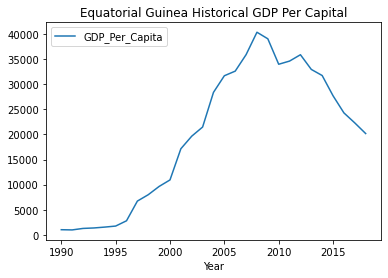

In [26]:
gdp_df_eq_guin.plot(kind = 'line', x = 'Year', y = 'GDP_Per_Capita')
plt.title('Equatorial Guinea Historical GDP Per Capital')

In [27]:
gdp_df_china = gdp_df[gdp_df['Country']=='China']
gdp_df_china.head()

,Country,Year,GDP_Per_Capita
1126,China,2018,16181.777716
1127,China,2017,15253.993071
1128,China,2016,14368.630801
1129,China,2015,13534.846237
1130,China,2014,12725.089099


Text(0.5, 1.0, 'China Historical GDP Per Capital')

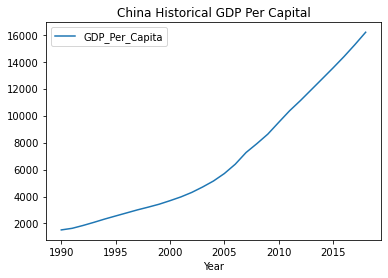

In [28]:
gdp_df_china.plot(kind = 'line', x = 'Year', y = 'GDP_Per_Capita')
plt.title('China Historical GDP Per Capital')

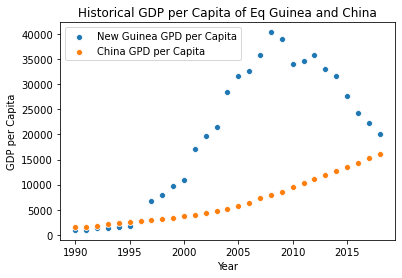

In [79]:
sns.scatterplot(gdp_df_eq_guin['Year'],gdp_df_eq_guin['GDP_Per_Capita'],label="New Guinea GPD per Capita")
sns.scatterplot(gdp_df_china['Year'],gdp_df_china['GDP_Per_Capita'],label="China GPD per Capita")
plt.xlabel('Year')
plt.ylabel('GDP per Capita')
plt.title('Historical GDP per Capita of Eq Guinea and China')
plt.legend()

# 18

In [30]:
#reading in continents df
continents = pd.read_csv("../data/continents.csv")

In [31]:
continents.head()

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola


In [32]:
gdp_df = gdp_df.merge(continents,on='Country')

gdp_df.head()

# 20

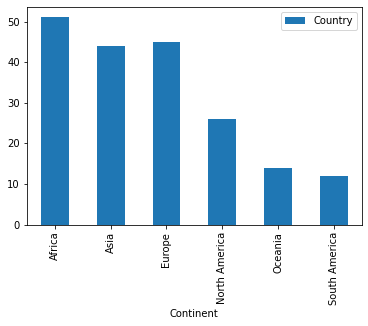

In [33]:
unique_countries = gdp_df.groupby('Continent').agg({'Country':'nunique'}).plot(kind = 'bar')

# 21

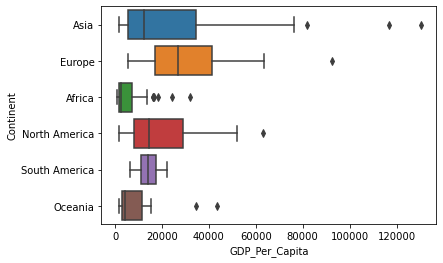

In [34]:
sns.boxplot(data = gdp_df[gdp_df['Year'] == 2014], x = 'GDP_Per_Capita', y = "Continent")

# 22

In [35]:
#reading in continents df
internet_df = pd.read_csv("../data/internet_use.csv",error_bad_lines=False,skipfooter=181,engine='python')
internet_df.tail()

Skipping line 4675: ',' expected after '"'. Error could possibly be due to parsing errors in the skipped footer rows (the skipfooter keyword is only applied after Python's csv library has parsed all rows).


,Country or Area,Year,Value,Value Footnotes
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


# 23

In [36]:
internet_df = internet_df.drop('Value Footnotes', axis = 1)

In [37]:
internet_df = internet_df.rename(columns = {'Country or Area' : 'Country','Value':'Internet_Users_Pct' })
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739


# 24

In [38]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             4495 non-null   object 
 1   Year                4495 non-null   int64  
 2   Internet_Users_Pct  4495 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 105.5+ KB


# 25

In [39]:
internet_df[internet_df['Internet_Users_Pct']>0].sort_values(by='Year')

,Country,Year,Internet_Users_Pct
2048,Italy,1990,0.017545
1107,Denmark,1990,0.097277
375,Belgium,1990,0.001007
1388,Finland,1990,0.401088
4301,United States,1990,0.784729
...,...,...,...
2175,Kiribati,2014,12.250000
848,Colombia,2014,52.570000
1299,Ethiopia,2014,2.900000
623,Burundi,2014,1.380000


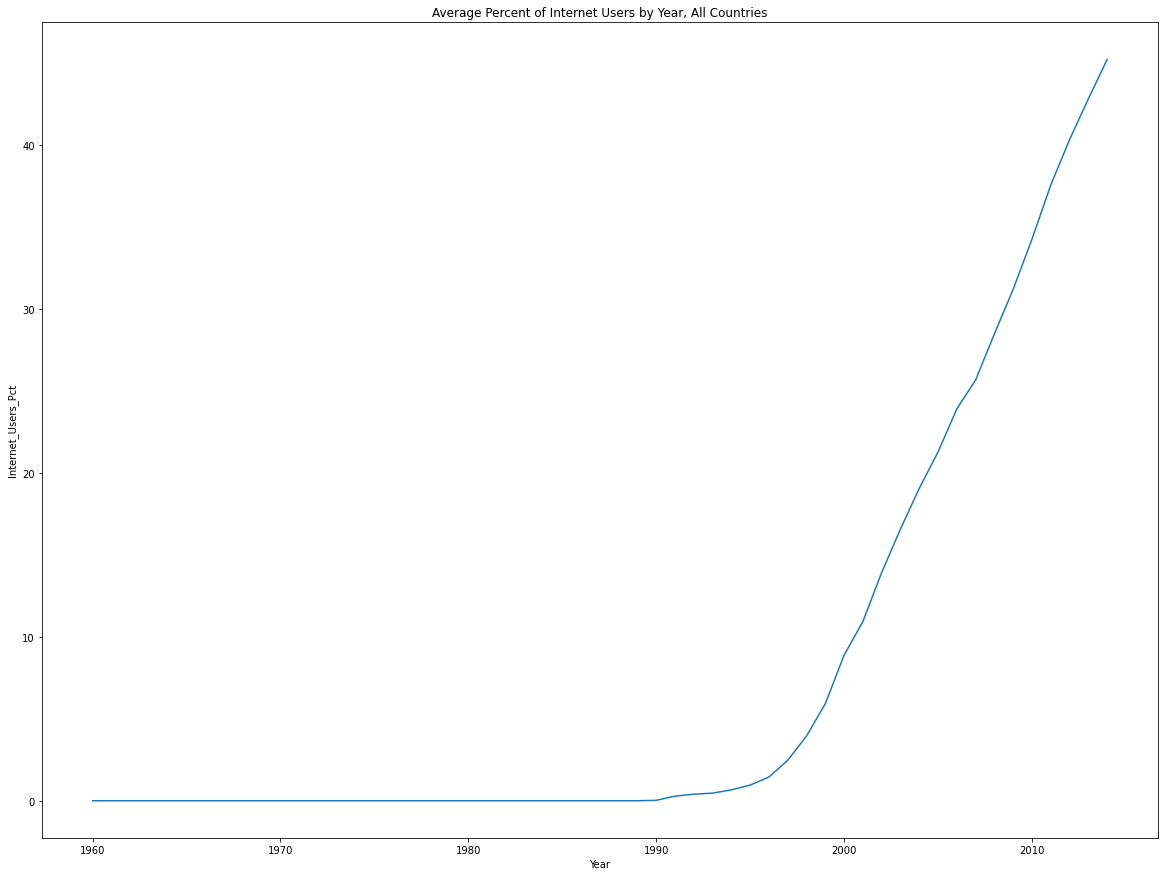

In [40]:
internet_df.groupby('Year')['Internet_Users_Pct'].mean().plot(kind = 'line', figsize=(20,15))
plt.title('Average Percent of Internet Users by Year, All Countries')
plt.ylabel('Internet_Users_Pct');

# 26

In [78]:
gdp_and_internet_use = gdp_df.merge(internet_df,on=['Country','Year'])
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
0,Afghanistan,2014,1795.735834,Asia,6.390000
1,Afghanistan,2013,1807.762344,Asia,5.900000
2,Afghanistan,2012,1772.764974,Asia,5.454545
3,Afghanistan,2011,1626.764793,Asia,5.000000
4,Afghanistan,2010,1671.581238,Asia,4.000000


In [77]:
pd.options.display.max_rows = 999
gdp_and_internet_use.groupby('Country').count()

,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
Country,,,,
Afghanistan,19,17,17,15
Albania,29,29,29,21
Algeria,29,29,29,22
American Samoa,1,0,0,1
Andorra,19,0,0,19
Angola,29,29,29,20
Antigua and Barbuda,29,29,29,21
Argentina,29,29,29,24
Armenia,29,29,29,22


#18

# 27

In [42]:
gdp_and_internet_use.tail()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
3514,Zimbabwe,1997,3036.422224,Africa,0.033080
3515,Zimbabwe,1996,2985.856605,Africa,0.016790
3516,Zimbabwe,1995,2736.486436,Africa,0.007684
3517,Zimbabwe,1994,2768.309953,Africa,0.001739
3518,Zimbabwe,1990,2819.549467,Africa,0.000000


# 28

In [43]:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014]
gdp_and_internet_use_2014

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
0,Afghanistan,2014,1795.735834,Asia,6.39
13,Albania,2014,10700.993216,Europe,60.10
34,Algeria,2014,13557.769757,Africa,18.09
56,Angola,2014,6813.052106,Africa,21.26
76,Antigua and Barbuda,2014,20440.540555,North America,64.00
...,...,...,...,...,...
3411,Vanuatu,2014,2837.122659,Oceania,18.80
3431,Venezuela,2014,17131.386907,South America,57.00
3455,Yemen,2014,3828.484887,Asia,22.55
3475,Zambia,2014,3684.685507,Africa,17.34


In [44]:
gdp_and_internet_use_2014['Internet_Users_Pct'].agg(['mean'])

mean    44.673536
Name: Internet_Users_Pct, dtype: float64

In [45]:
gdp_and_internet_use_2014[gdp_and_internet_use_2014['Internet_Users_Pct'] > 90].count()

Country               12
Year                  12
GDP_Per_Capita        12
Continent             12
Internet_Users_Pct    12
dtype: int64

# 29

In [46]:
gdp_and_internet_use_2014.sort_values('GDP_Per_Capita',ascending=False).head(3)

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
2556,Qatar,2014,116693.507701,Asia,91.49
1812,Luxembourg,2014,92349.186429,Europe,94.67
2765,Singapore,2014,81965.361071,Asia,82.00


In [47]:
gdp_and_internet_use_2014.sort_values('GDP_Per_Capita',ascending=False)

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
2556,Qatar,2014,116693.507701,Asia,91.49
1812,Luxembourg,2014,92349.186429,Europe,94.67
2765,Singapore,2014,81965.361071,Asia,82.00
1685,Kuwait,2014,72588.670676,Asia,78.70
2310,Norway,2014,63328.259526,Europe,96.30
...,...,...,...,...,...
1765,Liberia,2014,1257.625441,Africa,5.41
2116,Mozambique,2014,1222.452874,Africa,5.94
1856,Malawi,2014,1142.530804,Africa,5.83
2270,Niger,2014,900.136918,Africa,1.95


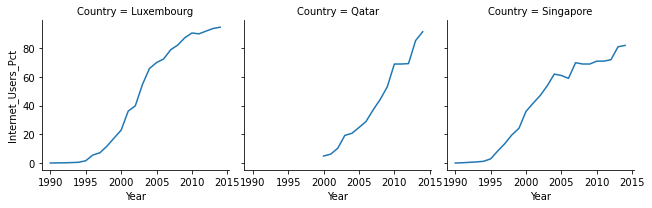

In [48]:
plt.figsize = (12,8)
gdp_and_internet_use_2014_top3 = gdp_and_internet_use[gdp_and_internet_use['Country'].isin(['Qatar','Luxembourg','Singapore'])]
g = sns.FacetGrid(gdp_and_internet_use_2014_top3, col = "Country" )
g.map_dataframe(sns.lineplot, "Year", 'Internet_Users_Pct')
plt.show()


Text(0.5, 1.0, 'GDP vs Internet Use')

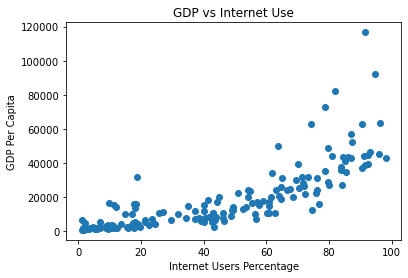

In [49]:
plt.scatter(x = gdp_and_internet_use_2014['Internet_Users_Pct'], y = gdp_and_internet_use_2014['GDP_Per_Capita'])
plt.xlabel('Internet Users Percentage')
plt.ylabel('GDP Per Capita')
plt.title('GDP vs Internet Use')

In [50]:
np.corrcoef(gdp_and_internet_use_2014.Internet_Users_Pct, gdp_and_internet_use_2014.GDP_Per_Capita)

array([[1.        , 0.78798857],
       [0.78798857, 1.        ]])

# 32

The correlation coefficient of .79 signifies a high level of correlation. 

In [51]:
gdp_and_internet_use_2014['GDP_Per_Capita_Log'] = np.log(gdp_and_internet_use_2014['GDP_Per_Capita'])


<ipython-input-51-6f91b66f00d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_and_internet_use_2014['GDP_Per_Capita_Log'] = np.log(gdp_and_internet_use_2014['GDP_Per_Capita'])


In [52]:
gdp_and_internet_use_2014.head()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct,GDP_Per_Capita_Log
0,Afghanistan,2014,1795.735834,Asia,6.39,7.493170
13,Albania,2014,10700.993216,Europe,60.10,9.278092
34,Algeria,2014,13557.769757,Africa,18.09,9.514715
56,Angola,2014,6813.052106,Africa,21.26,8.826595
76,Antigua and Barbuda,2014,20440.540555,North America,64.00,9.925275


# 33

In [53]:
gdp_and_internet_use_us = gdp_and_internet_use[gdp_and_internet_use['Country']=='United States']

In [55]:
np.corrcoef(gdp_and_internet_use_us.Internet_Users_Pct, gdp_and_internet_use_us.GDP_Per_Capita)

array([[1.        , 0.99161802],
       [0.99161802, 1.        ]])

This information is neither meaningful nor useful because correlation does not equal causation. There are a magnitude of variables that determine GDP.